In [51]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("Churn_modelling.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# remove irrelevant columns
cols_to_drop = ["RowNumber", 'CustomerId', 'Surname']
df = df.drop(columns=cols_to_drop, axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
deep_df = df.copy(deep = True)

In [15]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Exited']

In [16]:
print(numerical_columns)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']


In [17]:
df[numerical_columns].describe().loc[['min','max','mean','50%'],:]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,350.0000,18.0000,0.0000,0.000000,1.0000,0.0000,0.0000,11.580000
max,850.0000,92.0000,10.0000,250898.090000,4.0000,1.0000,1.0000,199992.480000
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881
50%,652.0000,37.0000,5.0000,97198.540000,1.0000,1.0000,1.0000,100193.915000


In [19]:
df[df['EstimatedSalary']==df['EstimatedSalary'].min()]

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2362,709,Germany,Male,45,4,122917.71,1,1,1,11.58,1


In [23]:
percentages = []
for gen in list(df["Gender"].unique()):
    
    p = round((df["Exited"][df["Gender"]==gen].value_counts()[1]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

Female (% to exit) :  25.07
Male (% to exit) :  16.46


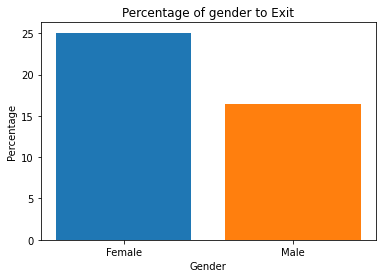

In [24]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.xticks((0,1), ('Female','Male'))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of gender to Exit")
plt.show()

In [25]:
percentages = []
for country in list(df["Geography"].unique()):
    
    p = round((df["Exited"][df["Geography"]==country].value_counts()[1]/df["Exited"][df["Geography"]==country].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(country,"(% to exit) : ", p)

France (% to exit) :  16.15
Spain (% to exit) :  16.67
Germany (% to exit) :  32.44


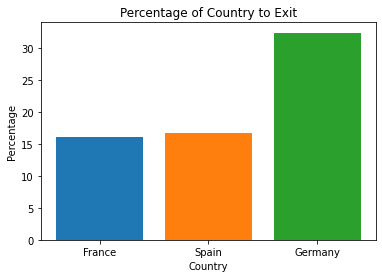

In [26]:
for i in range(len(percentages)):
    plt.bar(i, percentages[i])
plt.xticks((0,1,2), ('France', 'Spain', 'Germany'))
plt.xlabel("Country")
plt.ylabel("Percentage")
plt.title("Percentage of Country to Exit")
plt.show()

Text(0, 0.5, 'Frequency')

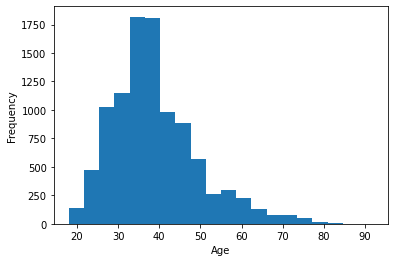

In [27]:
plt.hist(df["Age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'People who did not Exit (Exited = 0)')

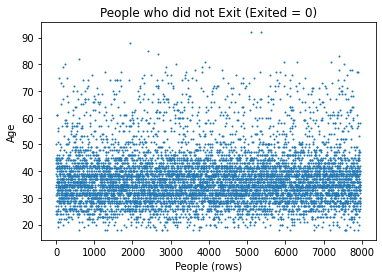

In [28]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==0]))),y=df["Age"][df["Exited"]==0],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who did not Exit (Exited = 0)")

Text(0.5, 1.0, 'People who Exited (Exited = 1)')

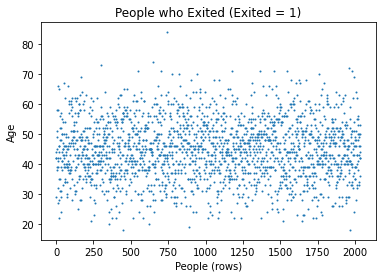

In [29]:
plt.scatter(x=range(len(list(df["Age"][df["Exited"]==1]))),y=df["Age"][df["Exited"]==1],s=1)
plt.ylabel("Age")
plt.xlabel("People (rows)")
plt.title("People who Exited (Exited = 1)")

In [30]:
age_bucket = df.groupby(pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100]))

In [31]:
age_bucket = round((age_bucket.sum()["Exited"] / age_bucket.size())*100 , 2)

In [32]:
age_bucket

Age
(10, 20]      5.62
(20, 30]      7.61
(30, 40]     12.09
(40, 50]     33.97
(50, 60]     56.21
(60, 70]     31.42
(70, 80]      8.26
(80, 90]     10.00
(90, 100]     0.00
dtype: float64

Text(0.5, 1.0, 'Percentage of people in different Age Groups that exited')

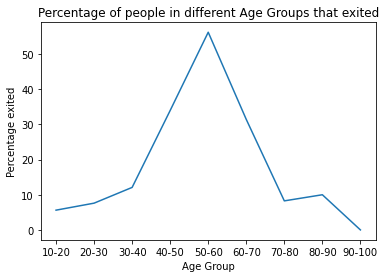

In [33]:
x = [str(i)+"-"+str(i+10) for i in range(10,91,10)]
plt.plot(x,age_bucket.values)
plt.xlabel("Age Group")
plt.ylabel("Percentage exited")
plt.title("Percentage of people in different Age Groups that exited")

In [34]:
df["Age"] = pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


In [36]:
df = pd.get_dummies(df)

df.head()

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,...,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]","Age_(90, 100]"
0,619,2,0.00,1,1,1,101348.88,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [37]:
df = df.drop(columns=["Geography_France","Gender_Female"],axis=1)

In [38]:
df = df.iloc[:,:-1]

In [65]:
df.to_csv('Clean_data.csv')